In [32]:
#importing necessary pacakges

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [9]:
# uploading the dataset

data = pd.read_csv('hr_dataset.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
#converting the attrition to numerical variable
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
#dropping some irrelevant variables
data = data.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'])

In [12]:
# one-hot encode other categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

In [19]:
# checking all the columns after one hot encoding
print("📋 All columns in the encoded dataset:\n")
for col in data_encoded.columns:
    print("-", col)

📋 All columns in the encoded dataset:

- Age
- Attrition
- DailyRate
- DistanceFromHome
- Education
- EnvironmentSatisfaction
- HourlyRate
- JobInvolvement
- JobLevel
- JobSatisfaction
- MonthlyIncome
- MonthlyRate
- NumCompaniesWorked
- PercentSalaryHike
- PerformanceRating
- RelationshipSatisfaction
- StockOptionLevel
- TotalWorkingYears
- TrainingTimesLastYear
- WorkLifeBalance
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager
- BusinessTravel_Travel_Frequently
- BusinessTravel_Travel_Rarely
- Department_Research & Development
- Department_Sales
- EducationField_Life Sciences
- EducationField_Marketing
- EducationField_Medical
- EducationField_Other
- EducationField_Technical Degree
- Gender_Male
- JobRole_Human Resources
- JobRole_Laboratory Technician
- JobRole_Manager
- JobRole_Manufacturing Director
- JobRole_Research Director
- JobRole_Research Scientist
- JobRole_Sales Executive
- JobRole_Sales Representative
- MaritalStatus_Married
- Marit

In [21]:
#checking the characteristic of the dataset
print('Descriptive Statistics:')
data_encoded.describe()

Descriptive Statistics:


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,...,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,36.938931,0.167939,785.711014,9.294438,2.921483,2.738277,66.231189,2.721919,2.044711,2.688113,...,0.176663,0.063250,0.100327,0.052345,0.198473,0.221374,0.054526,0.475463,0.312977,0.284624
std,8.984981,0.374016,401.902148,8.092566,1.020717,1.103382,20.237536,0.720936,1.100400,1.110097,...,0.381591,0.243544,0.300600,0.222843,0.399068,0.415398,0.227176,0.499670,0.463958,0.451481
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,444.000000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,772.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1141.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1.000000,1498.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#checking the correlation
data_encoded_corr = data_encoded.corr()
print(data_encoded_corr)

                                        Age  Attrition  DailyRate  \
Age                                1.000000  -0.131762   0.015520   
Attrition                         -0.131762   1.000000  -0.048373   
DailyRate                          0.015520  -0.048373   1.000000   
DistanceFromHome                  -0.005233   0.068046  -0.020108   
Education                          0.212077  -0.019755  -0.009338   
EnvironmentSatisfaction            0.013582  -0.083844   0.012806   
HourlyRate                         0.025792   0.003375   0.030298   
JobInvolvement                     0.034622  -0.101929   0.035912   
JobLevel                           0.520783  -0.145587  -0.025016   
JobSatisfaction                    0.012755  -0.118242   0.037679   
MonthlyIncome                      0.509918  -0.147760  -0.018352   
MonthlyRate                        0.053336  -0.015379  -0.046879   
NumCompaniesWorked                 0.295508   0.046537   0.053266   
PercentSalaryHike                 

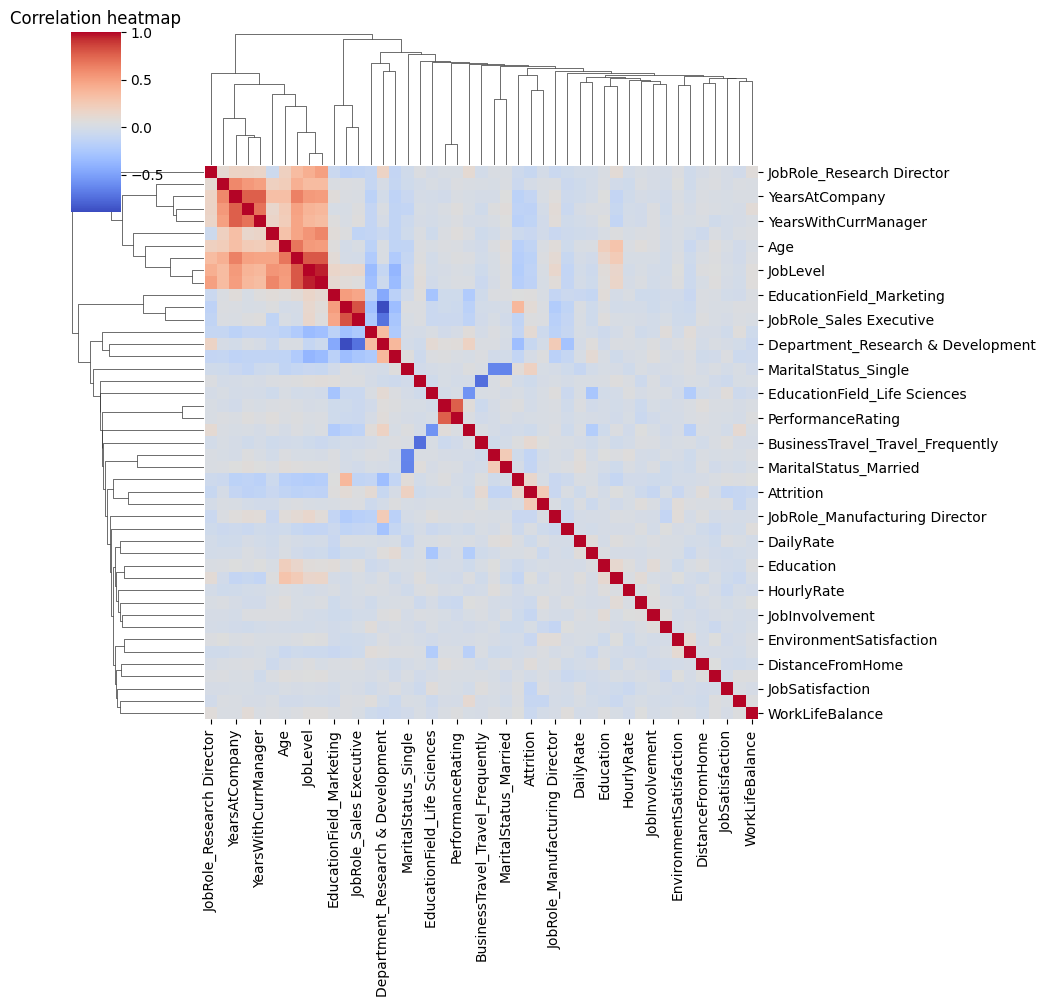

In [25]:
# creating a correlation heatmap for better visualization
sns.clustermap(data_encoded.corr(), cmap="coolwarm", figsize=(10, 10), annot=False)
plt.title('Correlation heatmap')
plt.show()

In [26]:
#assigning the variables
X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']

In [29]:
#splitting the dataset to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 45)

In [33]:
#feature scaling (for numerical values like age, monthly salary etc)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
#training the model

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [35]:
#predicting and evaluating the results

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Accuracy:", round(accuracy * 100, 2), "%")
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📄 Classification Report:\n", report)

✅ Accuracy: 85.33 %

📊 Confusion Matrix:
 [[144   5]
 [ 22  13]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.91       149
           1       0.72      0.37      0.49        35

    accuracy                           0.85       184
   macro avg       0.79      0.67      0.70       184
weighted avg       0.84      0.85      0.83       184



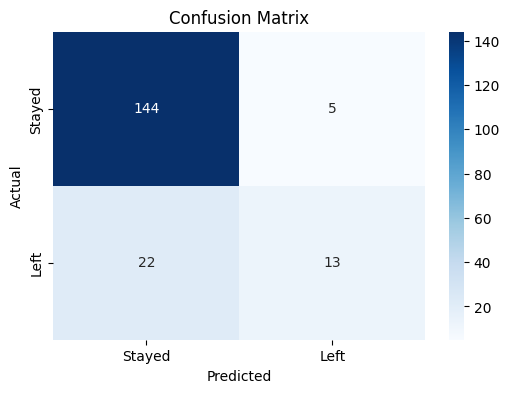

In [36]:
#visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

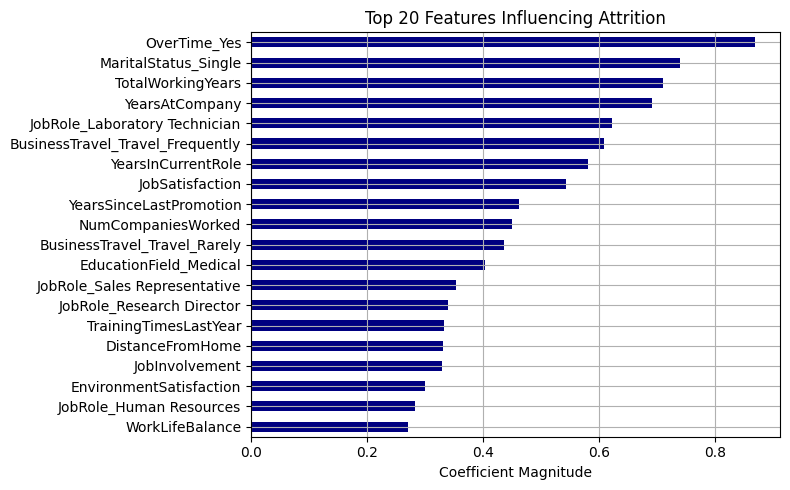

In [42]:
#Feature importance plot
coefficients = pd.Series(model.coef_[0], index=X.columns)
top_features = coefficients.abs().sort_values(ascending=False).head(20)

plt.figure(figsize=(8, 5))
top_features.sort_values().plot(kind='barh', color='navy')
plt.title("Top 20 Features Influencing Attrition")
plt.xlabel("Coefficient Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# What does a positive or negative coefficient indicate for each variable? Which feature has the strongest influence on employee attrition? In a logistic regression model, the coefficient values indicate the direction and magnitude of the relationship between each independent variable and the target variable (Attrition). For example, if Years at Company has a negative coefficient, it suggests that employees with longer tenure are less likely to leave. Identify which variable has the largest positive or negative impact on attrition and discuss why.

In [44]:
#ranking all the correlation
sorted_corr = data_encoded_corr['Attrition'].sort_values(ascending=True)
print(sorted_corr)

TotalWorkingYears                   -0.157005
YearsInCurrentRole                  -0.153272
MonthlyIncome                       -0.147760
JobLevel                            -0.145587
YearsWithCurrManager                -0.136138
Age                                 -0.131762
StockOptionLevel                    -0.119712
JobSatisfaction                     -0.118242
YearsAtCompany                      -0.114671
MaritalStatus_Married               -0.112283
JobInvolvement                      -0.101929
TrainingTimesLastYear               -0.099161
Department_Research & Development   -0.093396
JobRole_Research Director           -0.092488
EnvironmentSatisfaction             -0.083844
JobRole_Manufacturing Director      -0.082054
JobRole_Manager                     -0.080784
WorkLifeBalance                     -0.078546
RelationshipSatisfaction            -0.057487
BusinessTravel_Travel_Rarely        -0.050134
DailyRate                           -0.048373
EducationField_Medical            

In [ ]:
# From the correlation analysis, overtime has the highest positive correlation of 0.2403, indicating it's a key factor in employees leaving the company. Conversely, total working years shows a negative correlation of -0.1570, suggesting that employees with more years at the company are more likely to stay.

In [ ]:
# Discuss practical implications: If the coefficient for Work-Life Balance is negative, what does it imply about its impact on attrition? If Overtime has a high positive coefficient, what does it suggest about its influence on employee retention? If Salary Level has a small or non-significant coefficient, what could be the reason?

In [ ]:
#It seems the correlation effectively reflects reality: employees with work-life balance (indicated by a negative correlation) feel cared for by the company and tend to stay because they maintain a life outside of work. On the other hand, overtime has the highest positive correlation, suggesting that employees dislike overtime as it can impact their life beyond work. While salary ('monthly income') is important, employees also value factors such as job satisfaction, their relationship status (single/married), work-life balance, and other factors (displays with negative correlation)